#Titanic Survival Prediction

### Importing and understanding the data

In [931]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.models import Model,Sequential
from keras.layers import Dense,Dropout

In [932]:
# Reading the two Datasets
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [933]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [934]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [935]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [936]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [937]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Cleaning the Datasets

In [938]:
# Fix the missing data

a = train["Embarked"].mode()[0] # we fill the 2 null values from the Embarked column in the train dataset using the mode of the column
f = test["Fare"].mean() # we fill the 1 null value from the Fare column in the test dataset using the mean of the column

m = train['Age'].mean() # we fill the 86 null values from the Age column in the test dataset using the mode of the column
train['Age'].fillna(m,inplace=True)
# drop cabin as the missing rate for this column nearly 40% and the other 2 columns as they will not be needed
train.drop(["Cabin","Name","Ticket"],inplace=True,axis=1) 
train["Embarked"].fillna(a,inplace=True)


m1 = test['Age'].mean()
test['Age'].fillna(m1,inplace=True)
test.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
test["Embarked"].fillna(a,inplace=True)
test["Fare"].fillna(f,inplace=True)

In [939]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [940]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [941]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [942]:
train.shape

(891, 9)

In [943]:
test.shape

(418, 8)

In [944]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             89
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

### Visualization

The below graph tells us that during the Titanic incident only 38.5 % percent of people survived, that is, little over every 1 in 3 persons surviving the incident.

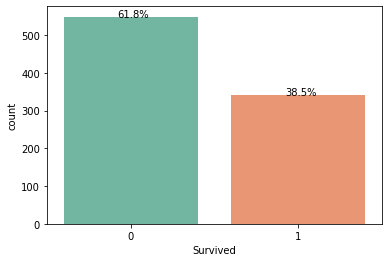

In [945]:
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(data = train,x="Survived", palette="Set2")

total = 889

for p,label in zip(ax.patches,l1):
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width() - 0.48
  y = p.get_y() + p.get_height()
  ax.annotate(percentage,(x,y))

Here we get to know that most of the passengers were male on the titanic.

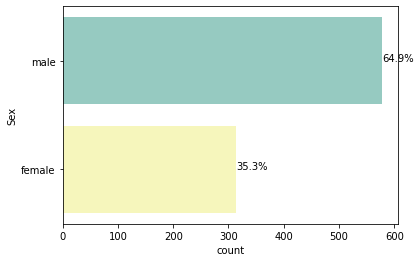

In [946]:
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(data = train,y="Sex", palette="Set3")

total = 889

for p,label in zip(ax.patches,l1):
  percentage = '{:.1f}%'.format(100 * p.get_width()/total)
  x = p.get_x() + p.get_width() + 0.5
  y = p.get_y() + p.get_height()/2 
  ax.annotate(percentage,(x,y))

From the below histograms we can analyse that-

*   Most of the people who did not survive were from the 3rd ticket class and were between the age of 24-30.
*   Most of the people who survived were from the 1st ticket class and were between the age of 25-31.


Survived
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

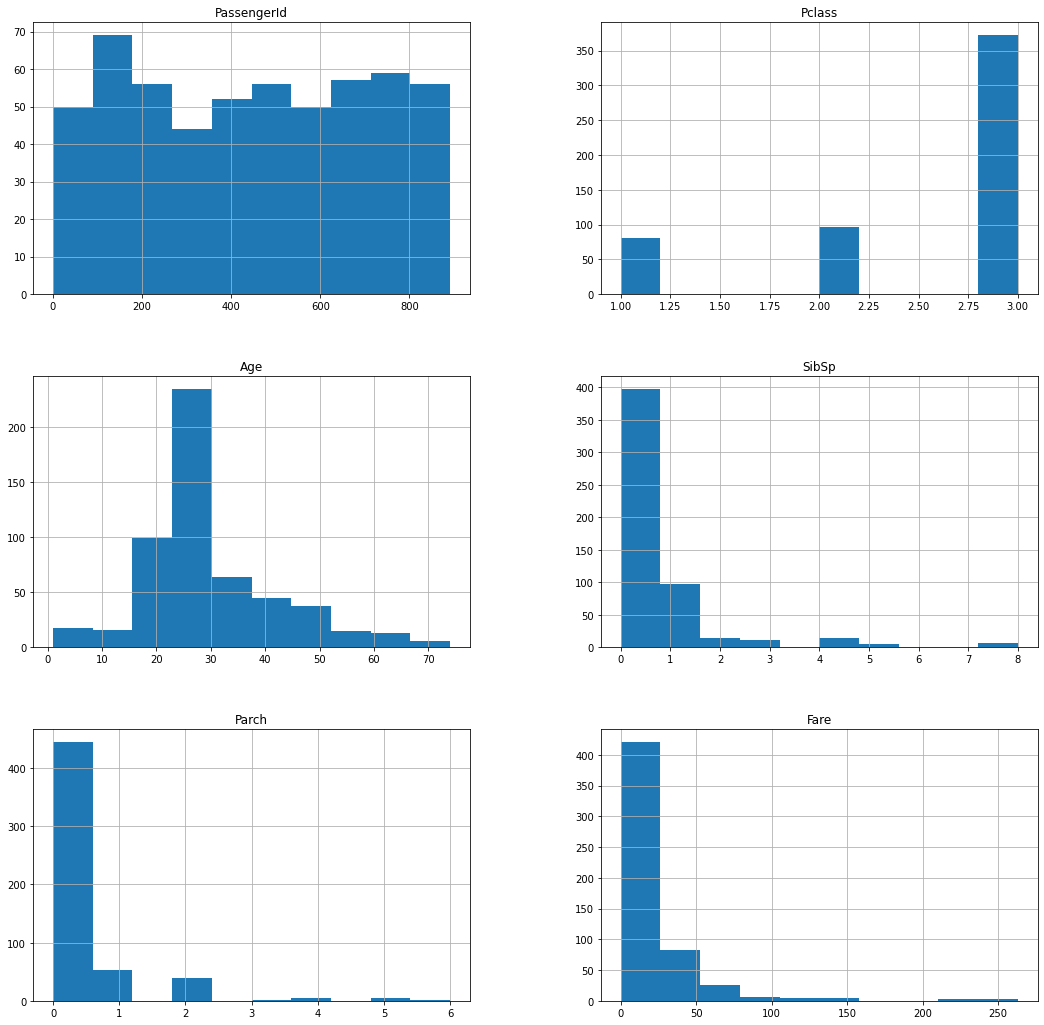

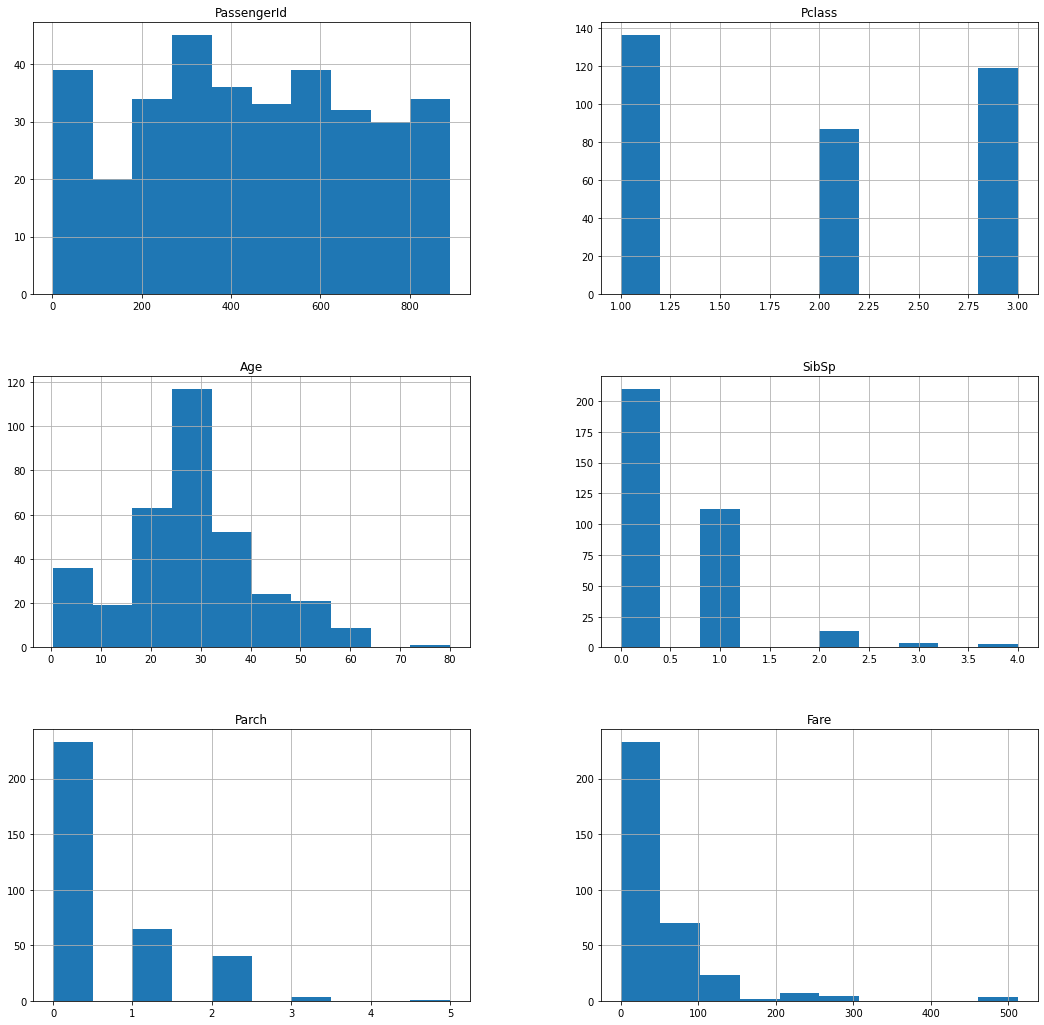

In [947]:
train.groupby('Survived').hist(figsize=(18, 18))

Here we see the mean survive rate depending on fare,class,age and embarkment.

In [948]:
train['FareGrouping'] = pd.qcut(train['Fare'], 5)
train[["FareGrouping","Survived"]].groupby(['FareGrouping'],as_index=False).mean().sort_values(by="FareGrouping")

,FareGrouping,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [949]:
train[["Pclass","Survived"]].groupby(['Pclass'],as_index=False).mean().sort_values(by="Pclass")

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [950]:
train['AgeGrouping'] = pd.qcut(train['Age'], 5)
train[["AgeGrouping","Survived"]].groupby(['AgeGrouping'],as_index=False).mean().sort_values(by="AgeGrouping")

,AgeGrouping,Survived
0,"(0.419, 20.0]",0.458101
1,"(20.0, 28.0]",0.360656
2,"(28.0, 29.699]",0.301508
3,"(29.699, 38.0]",0.444444
4,"(38.0, 80.0]",0.372881


In [951]:
train[["Embarked","Survived"]].groupby(['Embarked'],as_index=False).mean().sort_values(by="Embarked")

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [952]:
train.drop(["FareGrouping","AgeGrouping"],inplace=True,axis=1)

In [953]:
train.shape

(891, 9)

### Preprocessing

Here we label encode both the sex column and the Embark column to convert these categorical columns into numerical columns

In [954]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["Sex"]=le.fit_transform(train["Sex"])
test["Sex"] = le.fit_transform(test["Sex"])
train["Embarked"]=le.fit_transform(train["Embarked"])
test["Embarked"] = le.fit_transform(test["Embarked"])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [955]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [956]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


## Models

### Percentage

In [964]:
def percentage(y_pred):
  survived = 0
  not_survived = 0
  for i in range (0,418):
    if (y_pred[i] == 1) :
      survived = survived + 1
    else :
      not_survived = not_survived +1

  total=418
  p_survived = survived/total * 100
  p_not_survived = not_survived/total * 100

  print("Percentage of people predicted to survive",p_survived)
  print("Percentage of people predicted to not survive",p_not_survived)

### Dummy Classifier

The dummy classifier is used as a baseline model

In [1009]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier(random_state=0)
dummy.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=0, strategy='warn')

In [1010]:
y_pred_dummy = dummy.predict(test)

In [1011]:
percentage(y_pred_dummy)

Percentage of people predicted to survive 37.08133971291866
Percentage of people predicted to not survive 62.91866028708134


### Artificial Neural Network

In [957]:
X = train.drop(["Survived"],axis=1)
y = train["Survived"]

We split the training data in a 70/30 percent manner

In [958]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [959]:
model = Sequential()

model.add(Dense(units = 32, activation='relu', input_dim = 8))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [960]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 50,validation_data=(X_test,y_test))

Epoch 1/50
10/10 [==============================] - 1s 33ms/step - loss: 18.3958 - accuracy: 0.6397 - val_loss: 9.4443 - val_accuracy: 0.5858
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 6.5520 - accuracy: 0.6203 - val_loss: 2.6029 - val_accuracy: 0.4254
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 2.6141 - accuracy: 0.4355 - val_loss: 1.5315 - val_accuracy: 0.6007
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 1.5305 - accuracy: 0.6408 - val_loss: 0.6528 - val_accuracy: 0.7090
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.8581 - accuracy: 0.5555 - val_loss: 0.9291 - val_accuracy: 0.6455
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.9040 - accuracy: 0.6443 - val_loss: 0.6195 - val_accuracy: 0.7351
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.6634 - val_loss: 0.5968 - val_accuracy: 0.7201
Epoch 8/50
10/10 [

Here we see that the ANN predicted 18.6% of people to survived the incident.

In [961]:
y_pred_ann = model.predict(test)

survived = 0
not_survived = 0
for i in range (0,418):
  if (y_pred_ann[i] >= 0.5) :
    survived = survived + 1
  else :
    not_survived = not_survived +1

total=418
p_survived = survived/total * 100
p_not_survived = not_survived/total * 100

print("Percentage of people predicted to survive",p_survived)
print("Percentage of people predicted to not survive",p_not_survived)

Percentage of people predicted to survive 18.660287081339714
Percentage of people predicted to not survive 81.3397129186603


Below are a few plots to understand how the ann trained per epoch

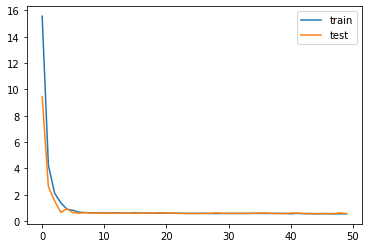

In [962]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

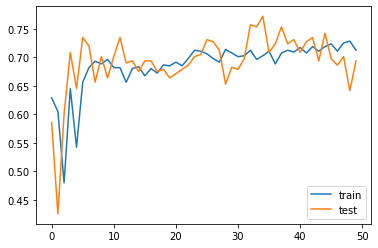

In [963]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### GridCV and Logistic Regression

In [977]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
parameters = [{'penalty' :['l1','l2','elasticnet'],'C': [1, 10, 100, 1000], 'solver': ['liblinear']},
              {'penalty' :['l1','l2','elasticnet'],'C': [1, 10, 100, 1000], 'solver': ['saga']},
              {'penalty' :['l1','l2','elasticnet'],'C': [1, 10, 100, 1000], 'solver': ['lbfgs']}]
grid_search=GridSearchCV(estimator=lr,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)

grid_search = grid_search.fit(X,y)

In [978]:
y_pred_lr = grid_search.predict(test)

The Logistic Regression predictes that only 38.2% of people to survived the incident.

In [979]:
percentage(y_pred_lr)

Percentage of people predicted to survive 38.27751196172249
Percentage of people predicted to not survive 61.72248803827751


### SVM

In [965]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [966]:
y_pred_svc=svc.predict(test)

The SVC predictes that only 3.8% of people survived the incident.

In [967]:
percentage(y_pred_svc)

Percentage of people predicted to survive 3.827751196172249
Percentage of people predicted to not survive 96.17224880382776


### Random Forest

In [980]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [981]:
y_pred_rf=rf.predict(test)

The Random Forest model predictes that 30.1% of people survived the incident.

In [982]:
percentage(y_pred_rf)

Percentage of people predicted to survive 30.14354066985646
Percentage of people predicted to not survive 69.85645933014354


### Passive Agressive Classifier

In [995]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier()
PAC.fit(X,y)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [996]:
y_pred_pa=PAC.predict(test)

The Passive Agressive model predictes that 31.8% of people survived the incident.

In [997]:
percentage(y_pred_pa)

Percentage of people predicted to survive 31.818181818181817
Percentage of people predicted to not survive 68.18181818181817
